# Basics
pltfront provides a streamlined interface to perform simple plots using matplotlib. We will introduce the Plot interface, briefly mentioning the design principles behind it.

## Simple plot
Let's plot a simple data set, *e.g.* an exponential function $f(x) = e^{x}$. To do so, we need to create a `Plot` instance and use the `Plot.plot()` function on our data.

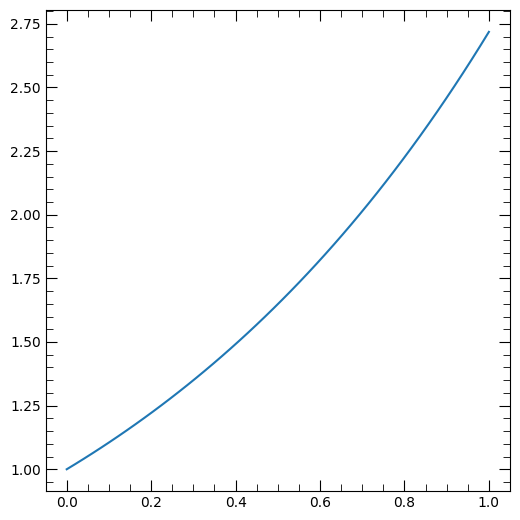

In [1]:
from pltfront.plot import Plot
import matplotlib.pyplot as plt
import numpy as np

# Generate the data set
x = np.linspace(0., 1.)
y = np.exp(x)

# Plot
plotting = Plot()
_ = plotting.plot(x, y, show=True)

By default, no plot is shown. To do so, we can specify the keyword argument `show = True`; the same logic applies for saving the plot, or to close the figure. Furthermore, the `Plot.plot()` function returns the current `fig, ax` object for further plot editing or manipulation.

### Plot kinds
Line plots aren't the only possibility - we can change plot kind by specifying the `kind` keyword argument.

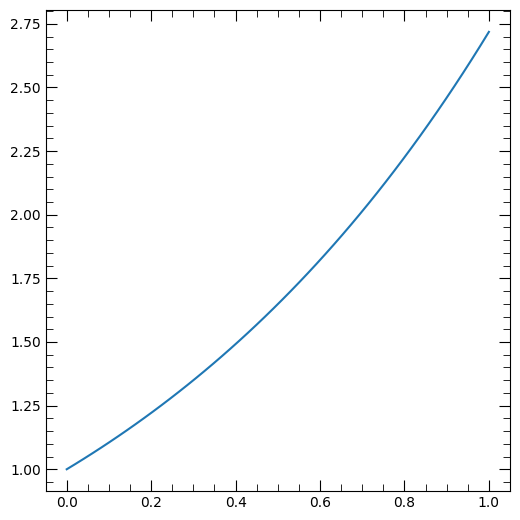

In [2]:
_ = plotting.plot(x, y, kind=plt.plot, show=True)

User provided plot kinds can be provided via `kind`, as long as they behave like `plt.plot`-like methods.

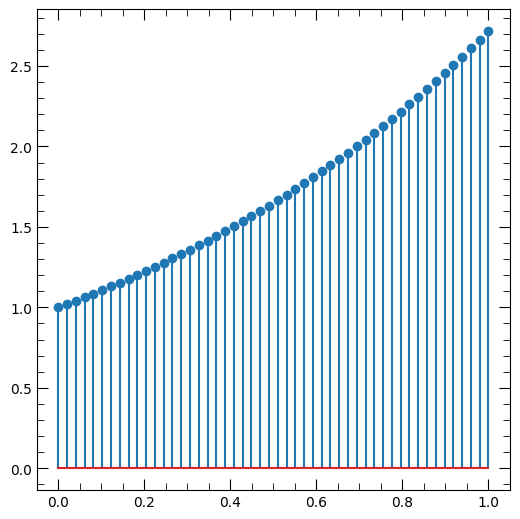

In [3]:
def stems(x, y, **kwargs):
    """A wrapper for `plt.stem`"""
    ax = plt.stem(x, y, **kwargs)
    return ax

fig, ax = plotting.plot(x, y, kind=stems, show=True)

## Multiple plots
We might want to plot multiple, superimposed plots. Suppose we have multiple data sets, *e.g.* $f_1(x) = e^{x}$ and $f_2(x) = e^{2x}$. We can easily implement this by creating a list containing $x_1, x_2$ and $f_1, f_2$ and passing it to our plotting function. We also should provide a kind for each $f_i$ we want to plot.

/media/iacopo/Data/Data/Personal_Proj/coding/coding_utilities/utils_env/lib/python3.10/site-packages/pltfront/plot.py:418: RuntimeWarning: x and labels have mismatching first dims, (2) and (1). Labels set to `None`.
  warnings.warn(


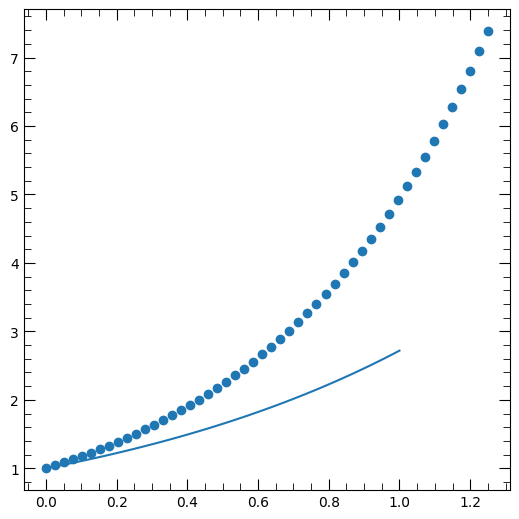

In [4]:
x2 = np.linspace(0., 1.25)
y2 = np.exp(2*x)

xs = [x, x2]
ys = [y, y2]
kinds = ['line', 'scatter']
_ = plotting.plot(xs, ys, kind=kinds, show=True)

Alternatively, $x$ and kinds can be neatly packaged using a dictionary, which can be passed to the function with no issue.

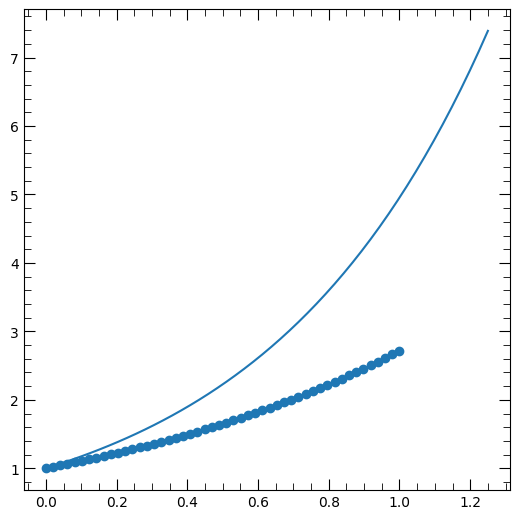

In [5]:
ds = {'scatter': x, 'line': x2}
_ = plotting.plot(ds, ys, show=True)

Let's suppose we want to plot multiple $y$ values on the same $x$ range. We can pass the desired $x$s once, provided that every $y$ array has the same dimensions.

x dimension: (50,), y dimension: (2, 50)


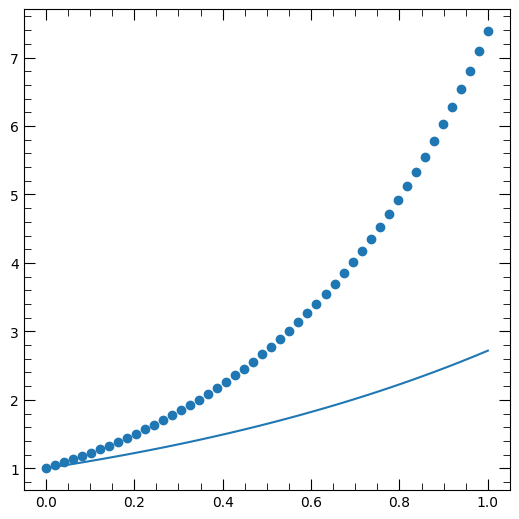

In [6]:
print(f'x dimension: {np.shape(x)}, y dimension: {np.shape(ys)}')
_ = plotting.plot(x, ys, kind=kinds, show=True)

## Saving to file
To save a plot to file, we need to specify an output directory when calling the `Plot` class, and then use the `save` keyword argument.

In [7]:
import os

# Output directory in current dir
plotting = Plot(out='out')
_ = plotting.plot(x, y, save=True)

## Titles, legends and labels
All it takes to add a title is to pass it via the `title` keyword. Likewise, ee can add a simple, box-less legend by using the `legend` keyword argument, provided we specified a label for each $x, f(x)$ plot.

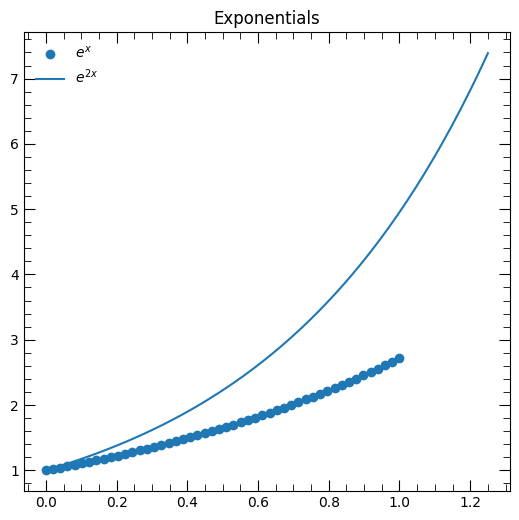

In [8]:
labels = [r'$e^{x}$', r'$e^{2x}$']
title = 'Exponentials'
_ = plotting.plot(ds, ys, title=title, label=labels, legend=True, show=True)

## Other plot properties
In most cases, specifying a keyword argument is enough to alter a plot property, *e.g* x and y limits, which points to skip and so on. A complete list is available in the [public API](https://codutils.frama.io/pltfront/api/pltfront). Even standard keyword arguments used by `pyplot`'s plotting functions can be passed with no issue using the `plot_kwargs` keyword, as a dictionary.

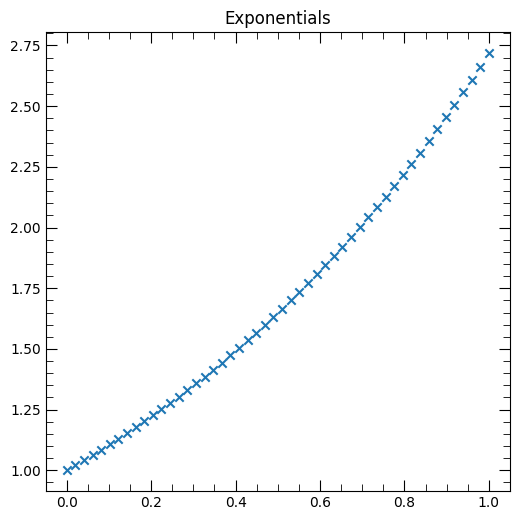

In [9]:
kwargs = {'marker': 'x'}
_ = plotting.plot(x, y, kind='scatter', title=title, plot_kwargs=kwargs, show=True)

## Style sheets
Matplotlib style sheets are supported by default. For example, we can plot against a black background using Matplotlib's default `dark_background` style sheet.

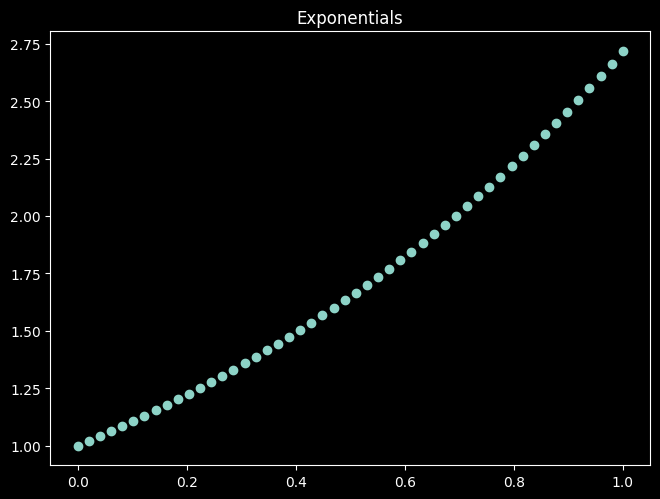

In [10]:
plotting = Plot(stylesheet='dark_background')
_ = plotting.plot(x, y, marker='x', kind='scatter', title=title, show=True)

User defined style sheets can also be used, as long as they conform to Matplotlib's [specifications](https://matplotlib.org/stable/users/explain/customizing.html#customizing-with-style-sheets). We can easily do so by passing our style sheet path to `Plot`.

In [ ]:
# Style sheet (dummy) path
user_defined_stsh = 'stsh/my_stylesheet.mplstyle'
plotting = Plot(stylesheet=user_defined_stsh)
_ = plotting.plot(x, y, marker='x', kind='scatter', title=title, show=True)